In [2]:
#from __future__ import division

#import datetime
import itertools
import json
import requests
# from requests_html import HTMLSession
#import operator


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
#import scipy.stats
#import statsmodels.api as sm

%matplotlib inline


In [3]:
url_6 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=1948cf36-2df1-4e98-95d7-152d30193d3c'
data_6 = pd.read_csv(url_6, encoding='big5')

url_5 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=91fbb8c2-4316-44ac-a101-e7b7ff3ba450'
data_5 = pd.read_csv(url_5, encoding='big5')

url_4 = 'C:/Users/user/Downloads/104a1a2.csv'
data_4 = pd.read_csv(url_4, encoding='utf-8')

url_3 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=5b31590b-1af7-4fed-ac25-6190178acfb5'
data_3 = pd.read_csv(url_3, encoding='big5')

url_2 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=c7fc1411-a8f0-4258-9f66-e16e58dd2cdd'
data_2 = pd.read_csv(url_2, encoding='big5')

url_1 = 'http://data.taipei/opendata/datalist/datasetMeta/download?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=dbc05cbf-cced-4793-84e8-fda5f67200da'
data_1 = pd.read_csv(url_1, encoding='big5')


In [7]:
#自行車車禍數量
bike_6 = data_6["車種"] == "F01"
bike_5 = data_5["車種"] == "F01"
bike_4 = data_4["車種"] == "F01"
bike_3 = data_3["車種"] == "F01"
bike_2 = data_2["車種"] == "F01"
bike_1 = data_1["車種"] == "F01"

list_a = [len(data_1[bike_1]),len(data_2[bike_2]),len(data_3[bike_3]),len(data_4[bike_4]),len(data_5[bike_5]),len(data_6[bike_6])]
list_t = [len(data_1),len(data_2),len(data_3),len(data_4),len(data_5),len(data_6)]
data = ['101','102','103','104','105','106']
dict_t = {"年份":data,'車禍數量':list_t}
dict_a = {"年份":data,"自行車車禍案件":list_a}

df_t = pd.DataFrame(dict_t)
df_a = pd.DataFrame(dict_a)
result = df_t.merge(df_a)

print(result)

    年份   車禍數量  自行車車禍案件
0  101  45950     1073
1  102  47705     1196
2  103  49135     1283
3  104  49519     1217
4  105  51692     1277
5  106  50951     1189


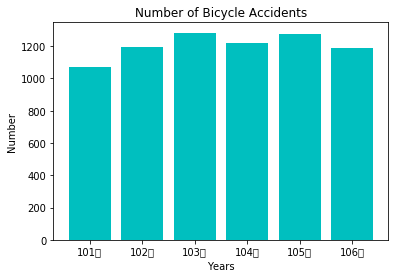

In [14]:
#自行車車禍數量

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y1 = list_a
x1 = ['101年','102年','103年','104年','105年','106年']
plt.xlabel("Years")
plt.ylabel("Number")
plt.title('Number of Bicycle Accidents')

plt.bar(x1,y1,color = "c")
plt.show()

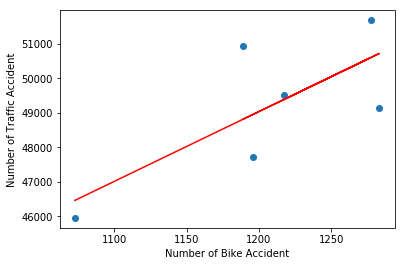

In [32]:
xs = list_a
ys = list_t
# np.corrcoef(list_a,list_t)
plt.scatter(list_a,list_t)

def slope(x_val,y_val):
    x = np.array(x_val)
    y = np.array(y_val)
    m = (((np.mean(x)*np.mean(y))-np.mean(x*y))/((np.mean(x)*np.mean(x))-np.mean(x*x)))
    m = round(m,2)
    b = (np.mean(y)-np.mean(x)*m)
    b = round(b,2)
    return m,b
m,b = slope(xs,ys)

reg_line = [(m*x)+b for x in xs]
plt.xlabel('Number of Bike Accident')
plt.ylabel('Number of Traffic Accident')

plt.plot(xs,reg_line,color = "r")
plt.show()

In [39]:
url = 'C:/Users/user/Desktop/ubike_num.csv'
num = pd.read_csv(url, encoding = 'big5')
# location = num.groupby('租借次數(車次)').size()
num.dropna()
# a = num.get("租借次數(車次)")
# print(a)
# print(num)
n = num.iloc[0:9,1]
m = num.iloc[0:9,0]

series_n =  pd.Series(n)
series_m = pd.Series(m)

print(series_m,series_n)


0     103年3月
1     103年4月
2     104年3月
3     104年4月
4     105年3月
5     105年4月
6     106年3月
7     106年4月
8     107年3月
Name: 月份, dtype: object 0    1767106
1    1938518
2    2065266
3    1662426
4    1242340
5    1582565
6    1719024
7    1900724
8    2191938
Name:   租借次數(車次), dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


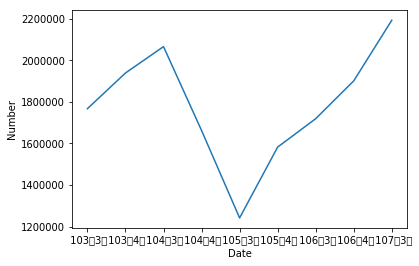

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y1 = series_n
x1 = series_m
plt.xlabel("Date")
plt.ylabel("Number")
# plt.rcParams['font.sans-serif']=['SimHei']



plt.plot(x1,y1)
plt.show()


In [44]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [32]:
ped_6 = data_6["車種"] == "H01"
ped_5 = data_5["車種"] == "H01"
ped_4 = data_4["車種"] == "H01"
ped_3 = data_3["車種"] == "H01"
ped_2 = data_2["車種"] == "H01"
ped_1 = data_1["車種"] == "H01"

b6 = len(data_6[ped_6])
b5 = len(data_5[ped_5])
b4 = len(data_4[ped_4])
b3 = len(data_3[ped_3])
b2 = len(data_2[ped_2])
b1 = len(data_1[ped_1])

list_b = [b1,b2,b3,b4,b5,b6]

print(list_b)

[2485, 2400, 2238, 2152, 2362, 2253]


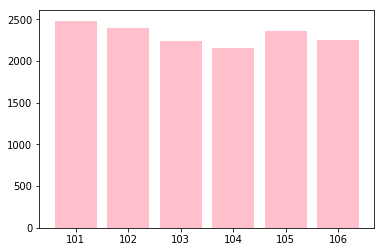

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
y1 = list_b
x1 = ['101','102','103','104','105','106']
plt.bar(x1,y1,color = "pink")
plt.show()

In [43]:
#事故位置
location_6 = data_6.groupby("9事故位置" and "車種").size()
location_5 = data_5.groupby("9事故位置" and "車種").size()
location_3 = data_3.groupby("9事故位置" and "車種").size()
location_2 = data_2.groupby("9事故位置" and "車種").size()
location_1 = data_1.groupby("9事故位置" and "車種").size()

list_c = [location_6,location_5,location_3,location_2,location_1]
df_location = pd.DataFrame(list_c)
# print(df_location)
df_location['F01']

0    1189.0
1    1277.0
2    1283.0
3    1196.0
4    1073.0
Name: F01, dtype: float64

In [5]:
#速限
limit_6 = data_6.groupby("7速限").size()
limit_5 = data_5.groupby("7速限").size()
limit_3 = data_3.groupby("7速限").size()
limit_2 = data_2.groupby("7速限").size()
limit_1 = data_1.groupby("7速限").size()

# limit_6.get("50")

list_limit = [limit_6,limit_5,limit_3,limit_2,limit_1]
df_limit = pd.DataFrame(list_limit)
# print(df_limit)
df_limit['50']


KeyError: '50'